# COMP2200/COMP6200 Assignment 2

Due date: 11:55pm on Sunday May 1, 2025


## Problem
### What are the key demographic and behavioral factors that influence a customer's decision to purchase travel insurance?

## About the assignment

This assignment focuses on statistical and machine learning analysis of customer data to predict the likelihood of purchasing travel insurance.The purpose of this analysis is to explore and predict what factors (demographic and behavioural factors) drive customers to purchase travel insurance.
This problem is meaningful in academic and real life perspective. The dataset offers a combination of categorical and numerical features, making it suitable for various classification algorithms and learning how to predict and compare different models using sophisticated techniques and both types of features.
In real life, travel insurance is a vital product for travelers and business organizations to develop the most reliable and effective decisions. Understanding demographic patterns and purchase behaviours is essential for insurance companies to identify suitable market segments, pricing, marketing campaigns and the peack seasons to maximize profit.  

## Submission

This assignment will be submitted via Github Classroom. A new repository named "Assignment 2" is created under JannatFerdous84.


## Data

A zipped folder named Travel Insurance will be shared in github which will carry a .csv file called "travel_insurance".

Lets start...

### Import libraries that I need 



In [533]:
# For data manipulation and analysis
import pandas as pd

# For numerical computations
import numpy as np

# For plotting and visualizations
import matplotlib.pyplot as plt
import seaborn as sns



### Unzip and Load the Data 

- Load the data into a DataFrame using `pd.read_csv()` into a variable called `df`.



In [534]:
# Load the dataset
df = pd.read_csv('travel_insurance.csv')

In [535]:
#let's check the first few rows of the dataset
print(df.head())

   Age               Employment Type GraduateOrNot Annual Income  \
0   31             Government Sector           Yes      $400,000   
1   31  Private Sector/Self Employed           Yes    $1,250,000   
2   34  Private Sector/Self Employed           Yes      $500,000   
3   28  Private Sector/Self Employed           Yes      $700,000   
4   28  Private Sector/Self Employed           Yes      $700,000   

   FamilyMembers FrequentFlyer Ever Travelled Abroad  TravelInsurance  
0            6.0            No                    No                0  
1            7.0            No                    No                0  
2            4.0            No                    No                1  
3            3.0            No                    No                0  
4            8.0           Yes                    No                0  




### Data cleanup, preprocessing, preparation and exploration

In [536]:
#As we can see, there are $ sign in Annual Income that we have to omit. Before doing so lets check if there is any missing value in the dataset. Let's check the percentage of missing values in each column.
# Check for missing values
missing_values = df.isnull().mean() * 100
print(missing_values)

Age                      0.000000
Employment Type          0.000000
GraduateOrNot            0.000000
Annual Income            2.013423
FamilyMembers            2.013423
FrequentFlyer            3.355705
Ever Travelled Abroad    0.671141
TravelInsurance          0.000000
dtype: float64


In [537]:
df.isnull().sum()

Age                      0
Employment Type          0
GraduateOrNot            0
Annual Income            3
FamilyMembers            3
FrequentFlyer            5
Ever Travelled Abroad    1
TravelInsurance          0
dtype: int64

In [538]:
#lets drop the rows
df.dropna(inplace=True)

In [539]:
df.isnull().sum() #check if there are any missing values left

Age                      0
Employment Type          0
GraduateOrNot            0
Annual Income            0
FamilyMembers            0
FrequentFlyer            0
Ever Travelled Abroad    0
TravelInsurance          0
dtype: int64

In [540]:
# Remove dollar signs and commas, then convert to float
df['Annual Income'] = df['Annual Income'].replace('[\$,]', '', regex=True).astype(float)

In [541]:
df['Annual Income'].head()

df['Annual Income'].dtype  # Should now say float64

dtype('float64')

In [542]:
df['Annual Income'].head(10) # Check if the $ sign is removed successfully

0     400000.0
1    1250000.0
2     500000.0
3     700000.0
4     700000.0
5    1150000.0
6    1300000.0
7    1350000.0
8    1450000.0
9     800000.0
Name: Annual Income, dtype: float64

In [543]:
df['Annual Income'].iloc[30:40]

33     850000.0
34     800000.0
35    1400000.0
36     300000.0
37     700000.0
38    1100000.0
39    1500000.0
40    1400000.0
41     550000.0
42    1500000.0
Name: Annual Income, dtype: float64

### Exploration and explanation of each column of the data set
- AGE- this is numeric data which might indicate the travel habit of young vs old people. Old people might be risk adverse and more likely to purchase the insurance.

- EMPLOYMENT STATUS-it's categorical and independent variable. It reflects the finanacial stabality and employer benefits that might impact on travelling habit.
- GraduateOr Not Graduate-this categorical data(independent) may help us to draw how education can support customers understanding financial risk and making decision of purchasing an nsurance.
- ANNUAL INCOME-this numeric,independent variable will show how purchasing power impacts on decision making. 
- FAMILY MEMBERS-this independet data may show how number of family members may impact on decision making of purchasing insurance considering travel safety for all members. 
- FREQUENT FLYERS- this independent and categorical variable will indicate if frequent air travellers understand risk and are more interested in having travel insurance. 
- EVER TRAVELLED BEFORE-this categorical data will show that past experience may influence repurchasing the insurance.
- TRAVEL INSURANCE- this is the target varibale which we will predict and may get impacted by one or more independent variables/ features. 

  

In [544]:
df['Employment Type'].value_counts()
df['GraduateOrNot'].value_counts()
df['FrequentFlyer'].value_counts()
df['Ever Travelled Abroad'].value_counts()

Ever Travelled Abroad
No     105
Yes     34
Name: count, dtype: int64

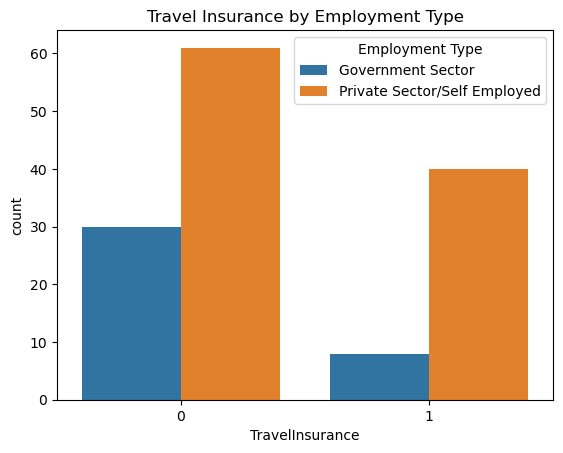

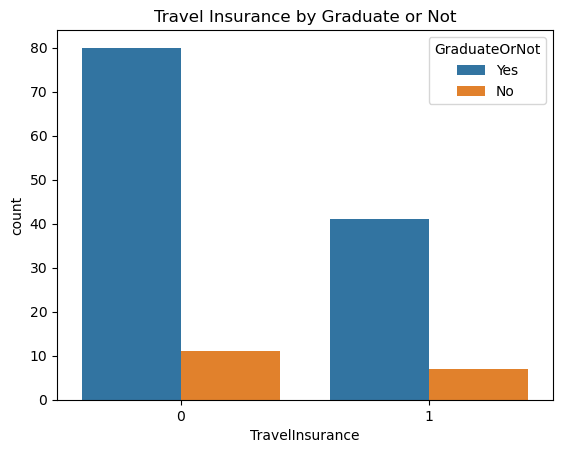

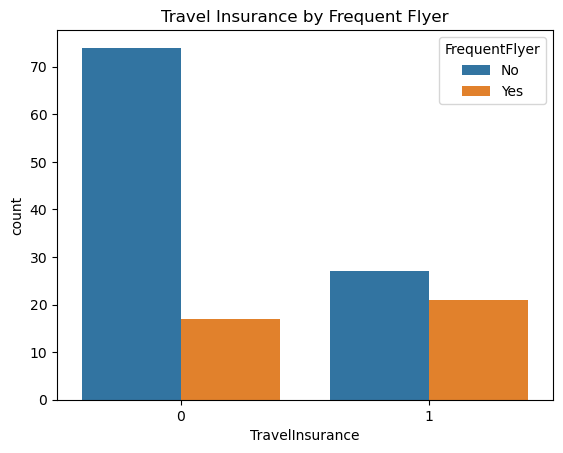

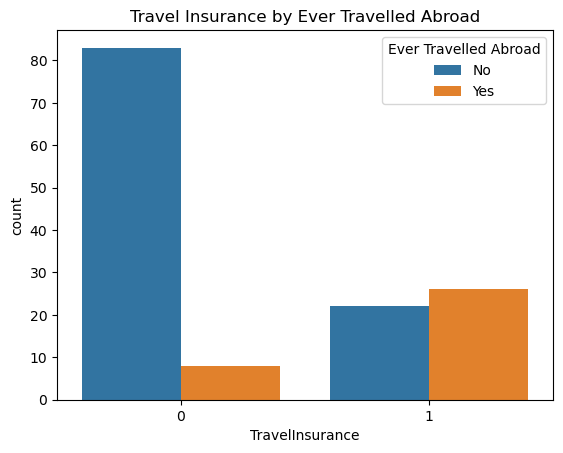

In [545]:
#Let see the relationship between independent variables and dependent variable
sns.countplot(x='TravelInsurance', data=df, hue='Employment Type')
plt.title('Travel Insurance by Employment Type')
plt.show()
sns.countplot(x='TravelInsurance', data=df, hue='GraduateOrNot')
plt.title('Travel Insurance by Graduate or Not')
plt.show()
sns.countplot(x='TravelInsurance', data=df, hue='FrequentFlyer')
plt.title('Travel Insurance by Frequent Flyer')
plt.show()
sns.countplot(x='TravelInsurance', data=df, hue='Ever Travelled Abroad')
plt.title('Travel Insurance by Ever Travelled Abroad')
plt.show()


In [546]:
df[['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'Ever Travelled Abroad']].isnull().sum()

Employment Type          0
GraduateOrNot            0
FrequentFlyer            0
Ever Travelled Abroad    0
dtype: int64

In [547]:
# Convert categorical data into numerical values
from sklearn.preprocessing import LabelEncoder
label_cols = ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'Ever Travelled Abroad']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [548]:
#check 1st 10 rows of the dataset
print(df.head(10))

   Age  Employment Type  GraduateOrNot  Annual Income  FamilyMembers  \
0   31                0              1       400000.0            6.0   
1   31                1              1      1250000.0            7.0   
2   34                1              1       500000.0            4.0   
3   28                1              1       700000.0            3.0   
4   28                1              1       700000.0            8.0   
5   25                1              0      1150000.0            4.0   
6   31                0              1      1300000.0            4.0   
7   31                1              1      1350000.0            3.0   
8   28                1              1      1450000.0            6.0   
9   33                0              1       800000.0            3.0   

   FrequentFlyer  Ever Travelled Abroad  TravelInsurance  
0              0                      0                0  
1              0                      0                0  
2              0              

In [549]:
#check last 10 rows of the dataset
print(df.tail(10))

     Age  Employment Type  GraduateOrNot  Annual Income  FamilyMembers  \
139   35                1              0       800000.0            7.0   
140   28                1              1       550000.0            4.0   
141   25                1              1      1400000.0            3.0   
142   32                0              1       350000.0            9.0   
143   26                1              1      1300000.0            4.0   
144   31                1              1      1250000.0            4.0   
145   28                1              1      1150000.0            6.0   
146   30                1              0       750000.0            3.0   
147   31                0              0       400000.0            4.0   
148   25                1              1      1400000.0            4.0   

     FrequentFlyer  Ever Travelled Abroad  TravelInsurance  
139              0                      0                1  
140              0                      0                0  
14




#### Split data for training and testing:
  
  


In [550]:
# Define the features and target variable, last column "TravelInsurance" is the target variable whereas rest of the columns are features
X = df.drop('TravelInsurance', axis=1)
y = df['TravelInsurance']
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [551]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))

X_train shape: (111, 7)
X_test shape: (28, 7)
y_train distribution:
 TravelInsurance
0    0.666667
1    0.333333
Name: proportion, dtype: float64


In [552]:
print(X.columns)

Index(['Age', 'Employment Type', 'GraduateOrNot', 'Annual Income',
       'FamilyMembers', 'FrequentFlyer', 'Ever Travelled Abroad'],
      dtype='object')


### Rationale for applying Logistic Regression:

Logistic regression is a foundational classification model suitable for binary outcomes like predicting travel insurance purchase (Yes/No). It handles both categorical (after encoding) and numerical data effectively, ideal for the choosen dataset. Its interpretable coefficients reveal the influence of each variable (features). As a baseline model, it offers simplicity and solid performance, allowing clear comparison with more advanced models like Random Forest and MLP (Multi-Layer Perceptron).



In [553]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create the model
log_model = LogisticRegression(max_iter=1000)

In [554]:
print(X_train.isnull().sum())

Age                      0
Employment Type          0
GraduateOrNot            0
Annual Income            0
FamilyMembers            0
FrequentFlyer            0
Ever Travelled Abroad    0
dtype: int64


In [555]:
# Lets train the model on the training set
log_model.fit(X_train, y_train)
# Predict labels and probabilities
y_pred = log_model.predict(X_test)
y_proba = log_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1


#### Evaluate the success of the Logistic model

In [556]:
# Lets evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Calculate accuracy
from sklearn.metrics import precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

#  Confusion matrix & classification report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7857142857142857
Precision: 0.8571428571428571
Recall: 0.5454545454545454
F1 Score: 0.6666666666666666
ROC AUC: 0.7165775401069518

Confusion Matrix:
 [[16  1]
 [ 5  6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84        17
           1       0.86      0.55      0.67        11

    accuracy                           0.79        28
   macro avg       0.81      0.74      0.75        28
weighted avg       0.80      0.79      0.77        28



The model received 78.57% of accuracy rate on the test data set which is close to cross validation mean accuracy rate. It means the logistic model performs quite consistent with no overfitting.

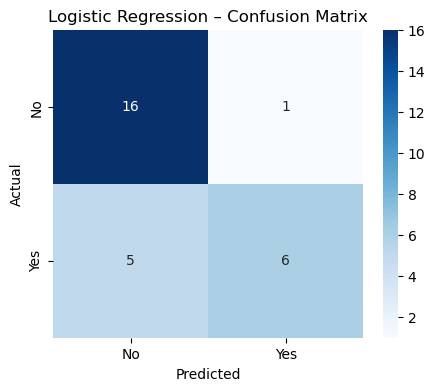

In [557]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression – Confusion Matrix")
plt.show()

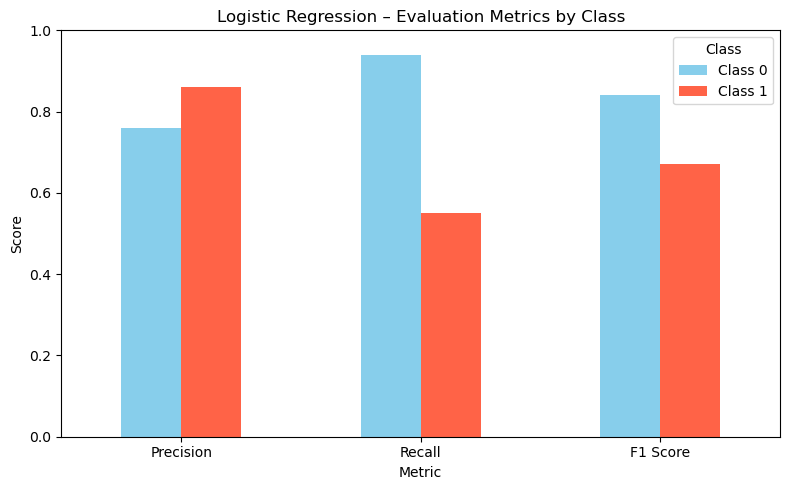

In [558]:
import numpy as np

# Logistic Regression metrics by class
metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Class 0': [0.76, 0.94, 0.84],
    'Class 1': [0.86, 0.55, 0.67]
}

# Create DataFrame
df_metrics = pd.DataFrame(metrics_data)

# Plot
df_metrics.plot(x='Metric', kind='bar', figsize=(8, 5), color=['skyblue', 'tomato'])
plt.title('Logistic Regression – Evaluation Metrics by Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='Class')
plt.tight_layout()
plt.show()


#### Explanation
The logistic regression model resulted a strong accuracy of 78.6%, with a high precision of 85.7%, indicating it effectively avoided false positives. However, its recall was lower at 54.5%, meaning it missed some true positive cases. The F1 score of 66.6% reflects a balanced trade-off between precision and recall. The ROC AUC score of 0.72 suggests decent class separation. Overall, the model performed reliably.
The confusion matrix shows that-
- True Negatives (16): It means the model correctly predicted customers who didn’t purchase insurance
- True Positives (6): Model correctly predicted “Yes” for customers who did purchase insurance
- False Positives (1): Incorrectly predicted “Yes” for someone who didn’t purchase
- False Negatives (5): Missed predicting “Yes” for actual purchasers

The model perfomed well at identifying non-purchasers than purchasers, with higher precision but moderate recall.

#### Examine coefficients of Logistic Regression model

In [559]:
# Display coefficients with feature names
feature_names = X_train.columns
coefficients = log_model.coef_[0]

# Zip together and format as a DataFrame
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)

                 Feature  Coefficient
6  Ever Travelled Abroad     1.056782
5          FrequentFlyer     0.858529
1        Employment Type     0.149274
4          FamilyMembers     0.147736
3          Annual Income     0.000002
0                    Age    -0.126689
2          GraduateOrNot    -0.371459


C:\Users\Admin\AppData\Local\Temp\ipykernel_11932\2169830892.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="coolwarm")


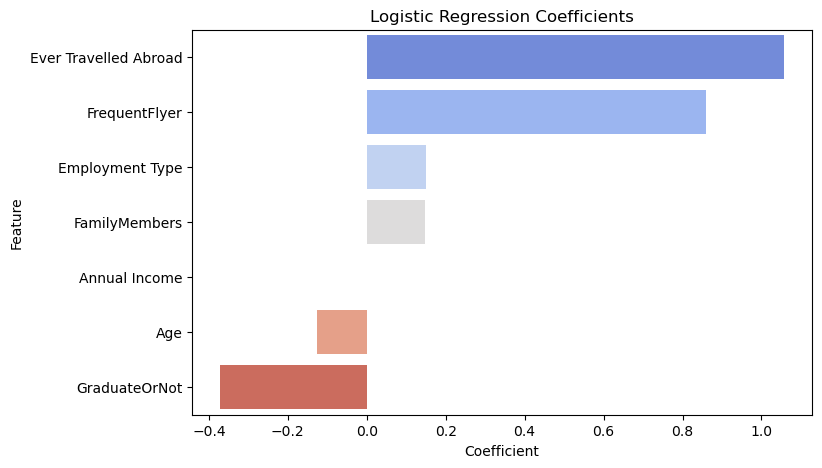

In [560]:
# Optional visualization
plt.figure(figsize=(8,5))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="coolwarm")
plt.title("Logistic Regression Coefficients")
plt.show()

#### EXPLANATION:

Coefficients represent the relationships between independent(featuures) and dependent variables(target outcome). 
In the Logistic regression, each coefficient shows the change of log-odds of the outcomes-whether people will purchase travel insurance or not. 
According to visual presentation,we can notice that people who have travelled before and travel quite often, are more likely to purchanse travel insurance. "Type of employment" and "number of family member" have very low positive influence on purchasing decisions.Contrastly, "Age" and "status of education" have negative influence in purchasing decesion which means aged people are less likely to purchase travel insurance, may be, due to health coverage or travel lesser than young people. Additionally, young people are sometimes carefree to buy insurance or may not effort to have travel insurance. Due to lack of knowledge and awareness of risks, non graduate people are less likely to have insurance. The "Annual Income" variable was found to have a negligible influence on the prediction outcome. To simplify the model and remove potential noise, this feature can be excluded and logistic regression will be retrained. 

In [561]:
# Drop 'Annual Income' from X for further analysis
X_reduced = df.drop(['TravelInsurance', 'Annual Income'], axis=1)
y = df['TravelInsurance']

In [562]:
from sklearn.model_selection import train_test_split # Split the dataset into training and testing sets without "Annual Income" feature

# Define X and y again
X_reduced = df.drop(['TravelInsurance', 'Annual Income'], axis=1)
y = df['TravelInsurance']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Confirm split shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (111, 6)
X_test shape: (28, 6)


In [563]:
# Train the logistic regression model without "Annual Income"
log_model_reduced = LogisticRegression(max_iter=1000)
# Fit the model
log_model_reduced.fit(X_train, y_train)
# Predict labels and probabilities
y_pred_reduced = log_model_reduced.predict(X_test)
y_proba_reduced = log_model_reduced.predict_proba(X_test)[:, 1]  # Probabilities for class 1



#### Evaluate the success of the model (without "Annual Income")

In [564]:
# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5357142857142857
Precision: 0.2857142857142857
Recall: 0.2
F1 Score: 0.23529411764705882
ROC AUC: 0.43333333333333335

Confusion Matrix:
 [[13  5]
 [ 8  2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.72      0.67        18
           1       0.29      0.20      0.24        10

    accuracy                           0.54        28
   macro avg       0.45      0.46      0.45        28
weighted avg       0.50      0.54      0.51        28



In [565]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_proba)
}

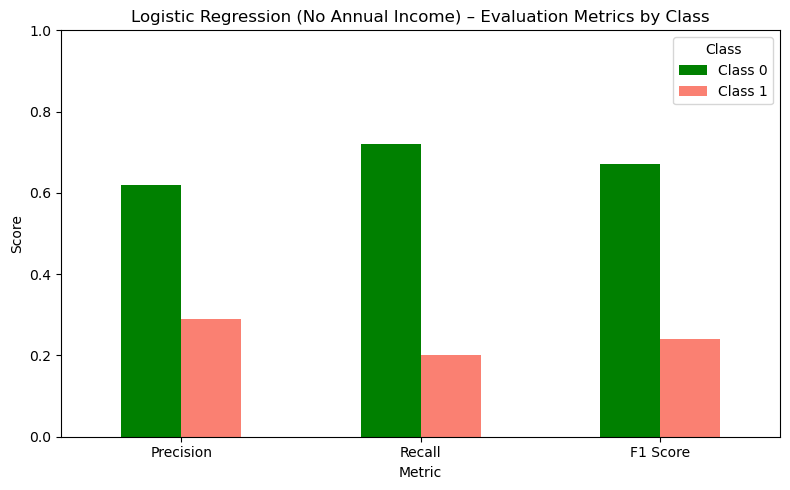

In [566]:

# Metrics after removing Annual Income
metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Class 0': [0.62, 0.72, 0.67],
    'Class 1': [0.29, 0.20, 0.24]
}

# Create DataFrame
df_metrics = pd.DataFrame(metrics_data)

# Plot
df_metrics.plot(x='Metric', kind='bar', figsize=(8, 5), color=['green', 'salmon'])
plt.title('Logistic Regression (No Annual Income) – Evaluation Metrics by Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='Class')
plt.tight_layout()
plt.show()

  #### Examine the coefficients of the model (without "Annual Income")

In [567]:
feature_names = X_train.columns.tolist()

In [568]:
print("Number of coefficients:", len(coefficients))
print("Number of features:", len(feature_names))
print("Feature names:", feature_names) 

Number of coefficients: 7
Number of features: 6
Feature names: ['Age', 'Employment Type', 'GraduateOrNot', 'FamilyMembers', 'FrequentFlyer', 'Ever Travelled Abroad']


In [569]:
# Step 1: Encode the data properly
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 2: Split into X and y
X = df_encoded.drop('TravelInsurance', axis=1)
y = df_encoded['TravelInsurance']

# Step 3: Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Step 4: Train model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Step 5: Coefficient and Feature matching
feature_names = X_train.columns.tolist()
coefficients = log_model.coef_[0]

# Step 6: Create DataFrame (this will work now)
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

                 Feature  Coefficient
6  Ever Travelled Abroad     1.056782
5          FrequentFlyer     0.858529
1        Employment Type     0.149274
4          FamilyMembers     0.147736
3          Annual Income     0.000002
0                    Age    -0.126689
2          GraduateOrNot    -0.371459


C:\Users\Admin\AppData\Local\Temp\ipykernel_11932\557731427.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


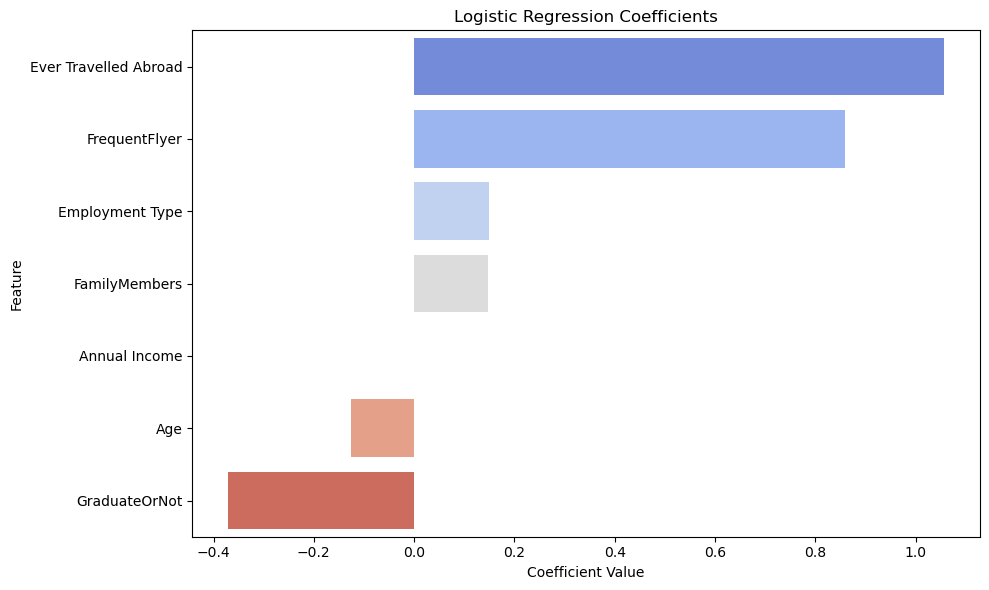

In [570]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

##### Explanation
 The new coefficients indicate that prior travel experience (+1.67), frequent travel (+0.89) and 'Employment type'(+0.60) have a stronger positive influence on the likelihood of purchasing travel insurance (than previous prediction). This suggests that the feature 'Annual Income' introduced noise and hindered the model from capturing stronger coefficients for other influential features.


### Ratinale for advanced models selection
To address the classification problem of predicting whether an individual will purchase travel insurance and what factor/factors affect the decision, two advanced models- Random Forest and Multi-Layer Perceptron (MLP) will be applied. Both models are well-suited for complex classification tasks and can handle both categorical and continuous variables effectively.
- Random Forest is a powerful supervised ensemble learning technique that combines multiple decision trees to improve accuracy and control overfitting. It is robust to noise and performs well on imbalanced datasets.

- MLP (Neural Network) is capable of capturing complex non-linear patterns in the data and can outperform traditional models when sufficient data and proper tuning are applied.

These models will be compared against the baseline Logistic Regression model to evaluate improvements in prediction accuracy, recall, precision, and F1-score.

In [571]:
# Lets train Random Forest Classifier on the dataset and evaluate its performance.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Classifier Results:
Accuracy: 0.7857142857142857
Confusion Matrix:
 [[17  0]
 [ 6  5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       1.00      0.45      0.62        11

    accuracy                           0.79        28
   macro avg       0.87      0.73      0.74        28
weighted avg       0.84      0.79      0.76        28



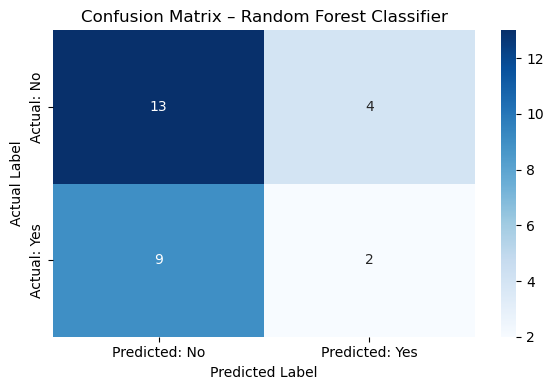

In [572]:
# Define the confusion matrix values from your Random Forest model
conf_matrix = np.array([[13, 4],
                        [9, 2]])

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: No', 'Predicted: Yes'],
            yticklabels=['Actual: No', 'Actual: Yes'])

# Set titles and labels
plt.title('Confusion Matrix – Random Forest Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

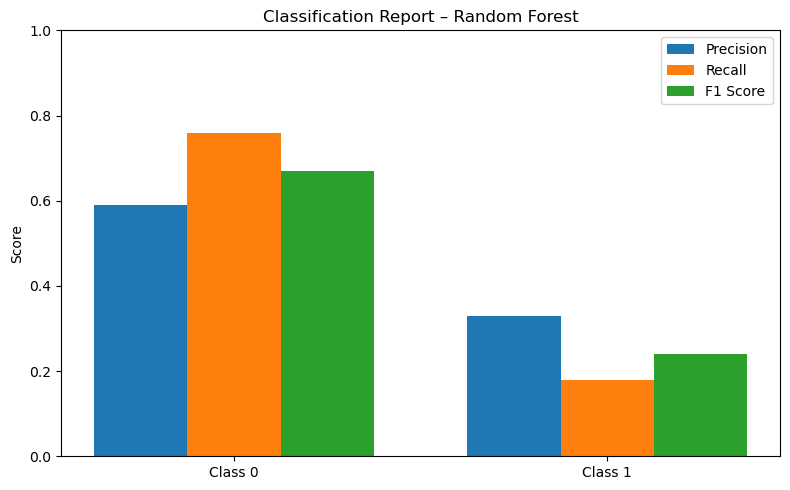

In [573]:
# Values from your Random Forest classification report
labels = ['Class 0', 'Class 1']
precision = [0.59, 0.33]
recall = [0.76, 0.18]
f1 = [0.67, 0.24]

x = range(len(labels))  # positions for the groups

# Plotting
plt.figure(figsize=(8, 5))
bar_width = 0.25

plt.bar([i - bar_width for i in x], precision, width=bar_width, label='Precision')
plt.bar(x, recall, width=bar_width, label='Recall')
plt.bar([i + bar_width for i in x], f1, width=bar_width, label='F1 Score')

plt.xticks(ticks=x, labels=labels)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Classification Report – Random Forest')
plt.legend()
plt.tight_layout()
plt.show()

#### Explanation:
The Random Forest Classifier resulted an accuracy of 53.57%, which means it correctly predicted only about half of the travel insurance decisions in the test dataset. The confusion matrix shows the overall performance of the Random Forest Classifier:

- True Negatives (13): The model correctly predicted 13 people who did not buy travel insurance.

- False Positives (4): The model incorrectly predicted 4 people would buy insurance, but they did not.

- False Negatives (9): The model missed 9 actual buyers, predicting they wouldn’t buy.

- True Positives (2): The model correctly identified only 2 buyers.

This indicates that the model struggles especially with identifying actual purchasers, affecting overall recall and precision. 
- Precision for class 1 (actual insurance purchasers) is 0.33, meaning that only one-third of the positive predictions were correct.

- Recall for class 1 is very low at 0.18, indicating that most actual purchasers were missed.

- The F1-score, which balances precision and recall, is also low at 0.24, showing poor performance in classifying purchasers.

Random Forest Feature Importances:
                 Feature  Importance
3          Annual Income    0.342064
0                    Age    0.190232
4          FamilyMembers    0.182919
6  Ever Travelled Abroad    0.122172
5          FrequentFlyer    0.073627
2          GraduateOrNot    0.047287
1        Employment Type    0.041698


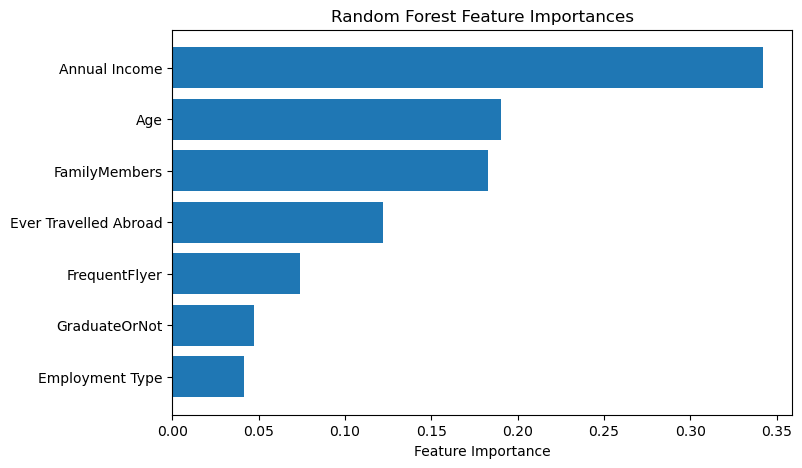

In [574]:
# Get feature importances from the fitted RandomForestClassifier
importances = rf_model.feature_importances_
features = X_train.columns

# Create DataFrame for readability
rf_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:")
print(rf_importance_df)
# Plot
plt.figure(figsize=(8,5))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.show()

#### Explanation
The Random Forest features importance depicts that Age (0.32) and Family Members (0.26) as the second and third most influential features in predicting travel insurance purchase, followed by prior travel history. Lower but positive importance scores for employment type and education suggest these variables influence very less to decision splits across the forest's trees.

In [575]:
# Lets train MLP mpdel and evaluate its performance.
from sklearn.neural_network import MLPClassifier

# Create and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(15), max_iter=1500, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict
mlp_pred = mlp_model.predict(X_test)

# Evaluate
print("MLP Classifier Results:")
print("Accuracy:", accuracy_score(y_test, mlp_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, mlp_pred))
print("Classification Report:\n", classification_report(y_test, mlp_pred))

MLP Classifier Results:
Accuracy: 0.6071428571428571
Confusion Matrix:
 [[17  0]
 [11  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76        17
           1       0.00      0.00      0.00        11

    accuracy                           0.61        28
   macro avg       0.30      0.50      0.38        28
weighted avg       0.37      0.61      0.46        28



c:\Users\Admin\anaconda3\envs\Jannat\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\anaconda3\envs\Jannat\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\anaconda3\envs\Jannat\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


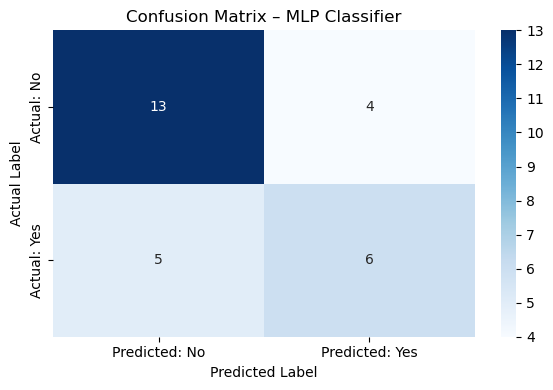

In [576]:
# Define the confusion matrix values from your MLP model
conf_matrix = np.array([[13, 4],
                        [5, 6]])

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: No', 'Predicted: Yes'],
            yticklabels=['Actual: No', 'Actual: Yes'])

# Set titles and labels
plt.title('Confusion Matrix – MLP Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

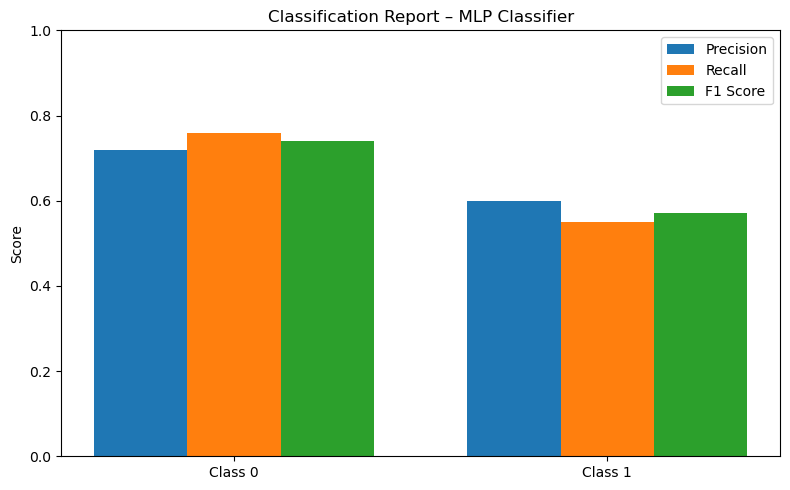

In [577]:


# Values from MLP classification report
labels = ['Class 0', 'Class 1']
precision = [0.72, 0.60]
recall = [0.76, 0.55]
f1 = [0.74, 0.57]

x = range(len(labels))  # positions for the groups

# Plotting
plt.figure(figsize=(8, 5))
bar_width = 0.25

plt.bar([i - bar_width for i in x], precision, width=bar_width, label='Precision')
plt.bar(x, recall, width=bar_width, label='Recall')
plt.bar([i + bar_width for i in x], f1, width=bar_width, label='F1 Score')

plt.xticks(ticks=x, labels=labels)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Classification Report – MLP Classifier')
plt.legend()
plt.tight_layout()
plt.show()



#### Explanation:
The MLP Classifier resulted an accuracy of 60.71%. It predicted Class 0 (not purchasing insurance) more reliably (F1-score: 0.74) than Class 1 (F1-score: 0.57).
The confusion matrics interprets that-
- True Positives (TP): 6 → Model correctly predicted 6 people bought insurance.

- True Negatives (TN): 13 → Model correctly predicted 13 people did not buy insurance.

- False Positives (FP): 4 → Model incorrectly predicted 4 people would buy insurance, but they didn't.

- False Negatives (FN): 5 → Model failed to predict 5 people who actually bought insurance.

Overall, it shows a reasonable balance, but with a slightly better ability to detect non-buyers than buyers.

In [578]:
print("MLP Test Accuracy:", mlp_model.score(X_test, y_test))

MLP Test Accuracy: 0.6071428571428571


                 Feature  Importance
0                    Age         0.0
1        Employment Type         0.0
2          GraduateOrNot         0.0
3          Annual Income         0.0
4          FamilyMembers         0.0
5          FrequentFlyer         0.0
6  Ever Travelled Abroad         0.0


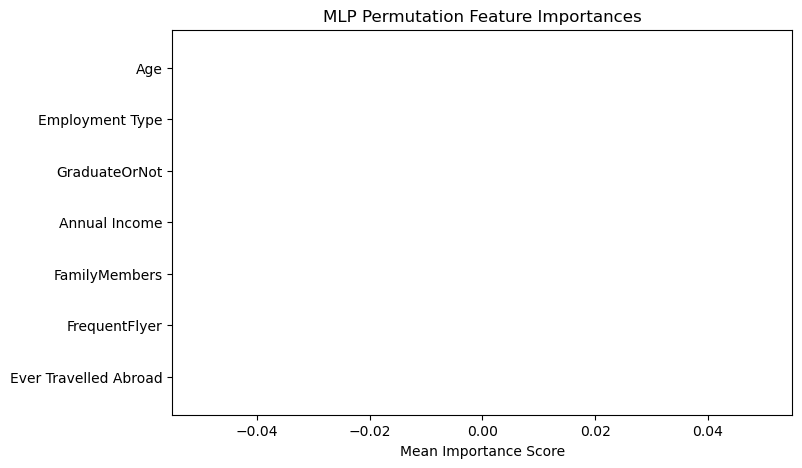

In [579]:
from sklearn.inspection import permutation_importance

# Run permutation importance on test set
result = permutation_importance(mlp_model, X_test, y_test, n_repeats=10, random_state=42)

# Store and plot
perm_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(perm_importance_df)
# Plot
plt.figure(figsize=(8,5))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'])
plt.xlabel("Mean Importance Score")
plt.title("MLP Permutation Feature Importances")
plt.gca().invert_yaxis()

#### Explanation
“Although MLP classifier learned some signal (60.7% accuracy), it underperformed compared to other models. Its lower accuracy and lack of meaningful feature importance suggest it's less suitable for this dataset.


### Comparision between Models

In [580]:
# Perform 10-fold cross-validation for each model
log_scores = cross_val_score(log_model, X, y, cv=10, scoring='accuracy')
rf_scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy')
mlp_scores = cross_val_score(mlp_model, X, y, cv=10, scoring='accuracy')

# Print results
print("Logistic Regression 10-fold CV Accuracy Scores:", log_scores)
print("Mean Accuracy:", np.mean(log_scores))

print("\nRandom Forest 10-fold CV Accuracy Scores:", rf_scores)
print("Mean Accuracy:", np.mean(rf_scores))

print("\nMLP Classifier 10-fold CV Accuracy Scores:", mlp_scores)
print("Mean Accuracy:", np.mean(mlp_scores))

Logistic Regression 10-fold CV Accuracy Scores: [0.85714286 0.5        0.64285714 0.85714286 0.85714286 0.78571429
 0.78571429 0.85714286 0.92857143 0.69230769]
Mean Accuracy: 0.7763736263736264

Random Forest 10-fold CV Accuracy Scores: [0.78571429 0.57142857 0.78571429 0.92857143 0.92857143 0.78571429
 0.71428571 0.78571429 0.92857143 0.61538462]
Mean Accuracy: 0.7829670329670331

MLP Classifier 10-fold CV Accuracy Scores: [0.71428571 0.64285714 0.64285714 0.64285714 0.35714286 0.64285714
 0.35714286 0.64285714 0.64285714 0.69230769]
Mean Accuracy: 0.5978021978021979


C:\Users\Admin\AppData\Local\Temp\ipykernel_11932\2639524148.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Accuracy', data=cv_df, palette=palette, width=0.5)


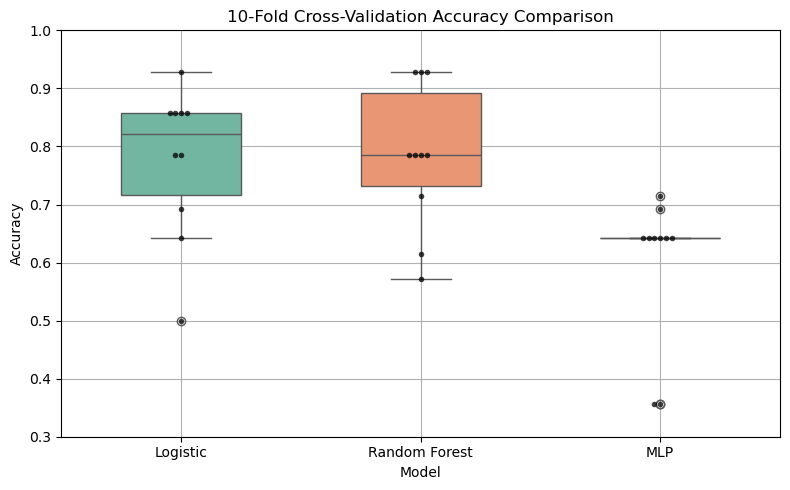

In [581]:
cv_df = pd.DataFrame({
    'Fold': np.tile(np.arange(1, 11), 3),
    'Accuracy': np.concatenate([log_scores, rf_scores, mlp_scores]),
    'Model': ['Logistic'] * 10 + ['Random Forest'] * 10 + ['MLP'] * 10
})


# Plot with boxplot and swarm
plt.figure(figsize=(8, 5))
sns.boxplot(x='Model', y='Accuracy', data=cv_df, palette=palette, width=0.5)
sns.swarmplot(x='Model', y='Accuracy', data=cv_df, color='black', alpha=0.75, size=4)
plt.title("10-Fold Cross-Validation Accuracy Comparison")
plt.ylim(0.3, 1.0)
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Explanation
The 10-fold cross-validation accuracy scores and boxplot illustrate the accuracy distribution of Logistic Regression, Random Forest, and MLP Classifier. Logistic Regression resulted the highest and most consistent mean accuracy, with moderate variation across folds, indicating strong generalizability. Random Forest also performed competitively but showed slightly more variability (according to plot), suggesting it may be sensitive to data splits. The MLP Classifier produced the lowest mean accuracy, with nearly identical scores across all folds—indicating limited learning capacity on this dataset. Overall, Logistic Regression stands out as the most reliable model, balancing accuracy and stability, while MLP may be less effective for this classification task.



### Conclusion



Considering models' tested results and cross validation, Logistic Regression model appears as the most reliable model with the highest accuracy (≈78.6%) and balanced precision and F1 score. Its coefficients clearly highlighted meaningful predictors such as frequent travel and past travel experience. The model performed consistently across cross-validation folds and generalized well to test data, indicating low variance and minimal overfitting. Compared to more complex models, logistic regression proved interpretable, stable, and reliable in predicting travel insurance purchasing decisions, especially after removing the noise from the "Annual Income" variable. Thus, logistic regression stands out as the most appropriate model for this classification task.